<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Welcome to Boston Massachusetts in the 1970s! You are tasked with building a model that can provide a price estimate of a residential project based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc


This project will cover:

1. Analysing and explore the Boston house price data
2. Spliting your data for training and testing
3. Running a Multivariable Regression
4. Evaluating how your model's coefficients and residuals
5. Using data transformation to improve your model performance
6. Using your model to estimate a property price

### Upgrade plotly (only Google Colab Notebook) id necessary.

In [75]:
# !pip install --upgrade plotly

###  Import Statements


In [76]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [77]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [78]:
data = pd.read_csv('data/boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎

* What is the shape of `data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [79]:
print(f"shape: {data.shape}")

shape: (506, 14)


In [80]:
print(f"Column names: {data.columns}")

Column names: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


In [81]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


## Data Cleaning - Check for Missing Values and Duplicates

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [83]:
print(f"Any NaN values: {data.isna().values.any()}")
print(f"Any duplicated values: {data.duplicated().values.any()}")

Any NaN values: False
Any duplicated values: False


## Descriptive Statistics

* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature? 
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [84]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [85]:
print(f"PTRATIO  pupil-teacher ratio by town - mean: {data.PTRATIO.mean():.4}")
print(f"PRICE (1000s of dolar) - average in the dataset (Boston 1970s): {data.PRICE.mean():.4}k $")
print("CHAS -  whether the property is next to Charles River or not. 1 for yes and 0 for not. \
    This is why it is called dummy variable")
print(f"RM - average number of rooms per dwelling - max is {data.RM.max():.4} and min is {data.RM.min():.3}")

PTRATIO  pupil-teacher ratio by town - mean: 18.46
PRICE (1000s of dolar) - average in the dataset (Boston 1970s): 22.53k $
CHAS -  whether the property is next to Charles River or not. 1 for yes and 0 for not.     This is why it is called dummy variable
RM - average number of rooms per dwelling - max is 8.78 and min is 3.56


## Visualise the Features

Visualise the data for the model. Using [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables: 
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways. 

Setting the `aspect` parameter to `2` for a better picture. 


#### House Prices

<Figure size 1600x800 with 0 Axes>

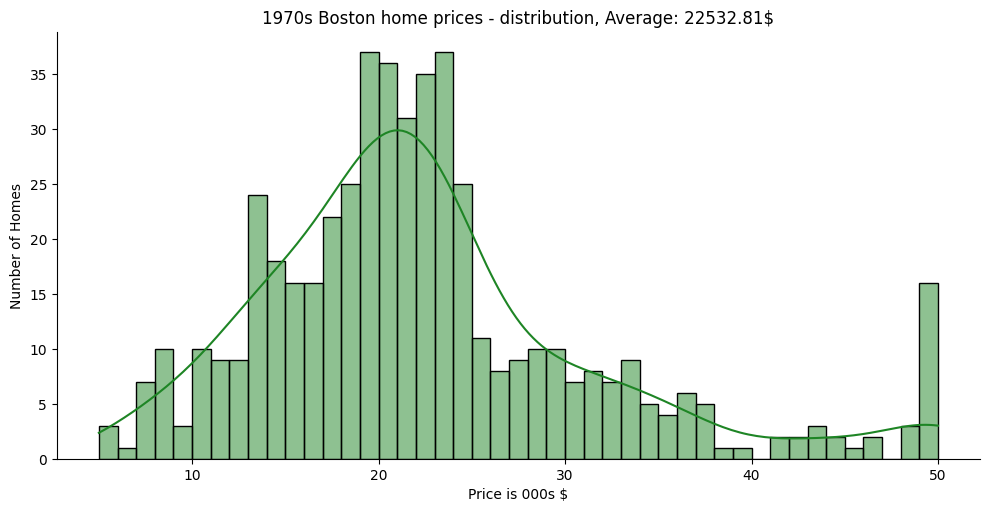

In [86]:
plt.figure(figsize=(8,4), dpi=200)

sns.displot(
    data,
    x='PRICE',
    bins=45,
    aspect=2,
    kde=True,
    color='#1e8525',
)
            
plt.title(f"1970s Boston home prices - distribution, Average: {data.PRICE.mean()*1000:.7}$")
plt.xlabel("Price is 000s $")
plt.ylabel("Number of Homes")

plt.show()

Outliner at 50,000$ ??

#### Distance to Employment - Length of Commute

<Figure size 1600x800 with 0 Axes>

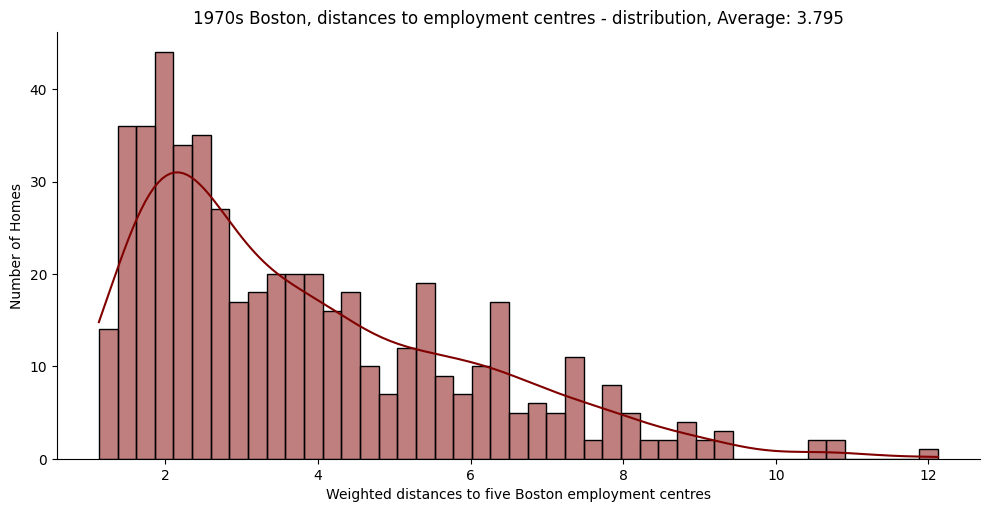

In [87]:
plt.figure(figsize=(8,4), dpi=200)

sns.displot(
    data,
    x='DIS',
    bins=45,
    aspect=2,
    kde=True,
    color='maroon',
)
            
plt.title(f"1970s Boston, distances to employment centres - distribution, Average: {data.DIS.mean():.4}")
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Number of Homes")

plt.show()

Most houses are at distanc of 3.8 miles from work.

#### Number of Rooms

<Figure size 1600x800 with 0 Axes>

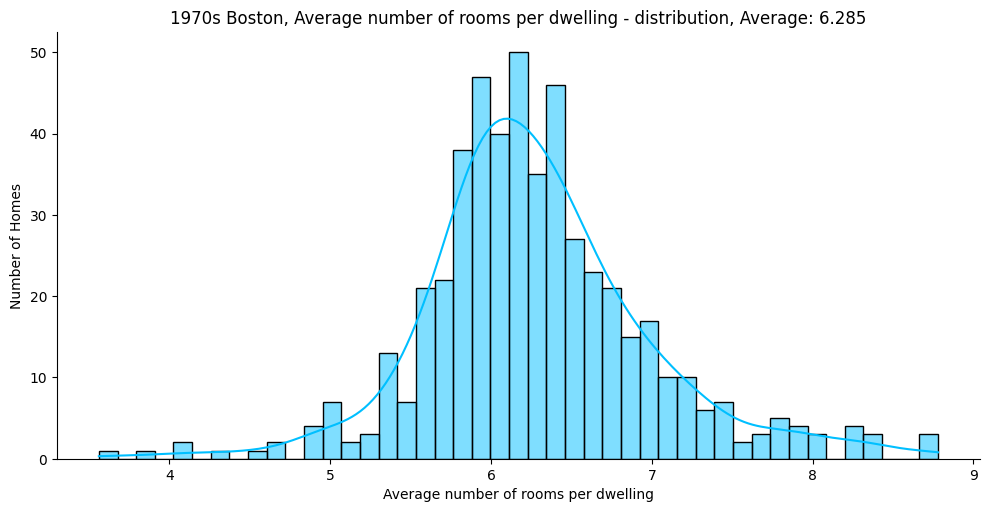

In [88]:
plt.figure(figsize=(8,4), dpi=200)

sns.displot(
    data,
    x='RM',
    bins=45,
    aspect=2,
    kde=True,
    color='deepskyblue',
)
            
plt.title(f"1970s Boston, Average number of rooms per dwelling - distribution, Average: {data.RM.mean():.4}")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Number of Homes")

plt.show()

Most houses have 6 rooms.

#### Access to Highways

<Figure size 1600x800 with 0 Axes>

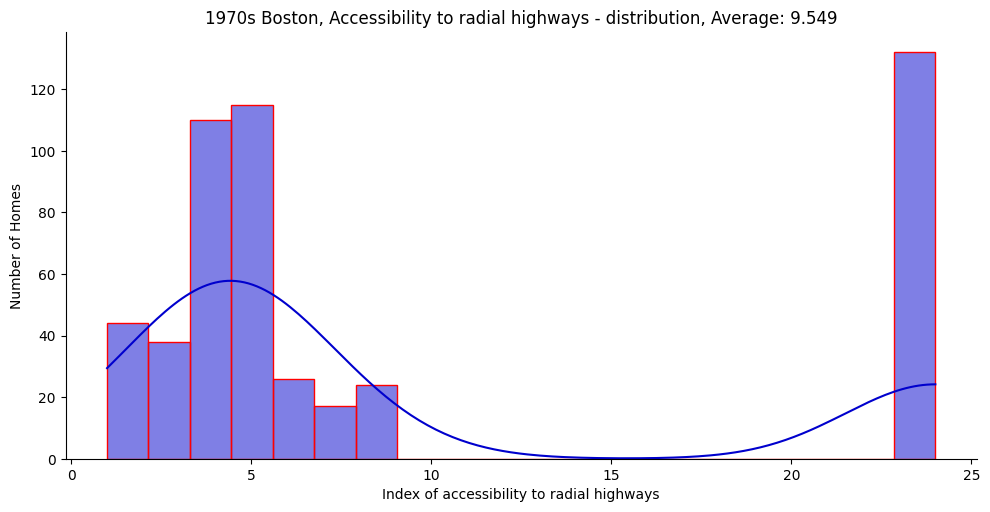

In [89]:
plt.figure(figsize=(8,4), dpi=200)

sns.displot(
    data,
    x='RAD',
    bins=20,
    aspect=2,
    ec='red',
    kde=True,
    color='mediumblue',
)
            
plt.title(f"1970s Boston, Accessibility to radial highways - distribution, Average: {data.RAD.mean():.4}")
plt.xlabel("Index of accessibility to radial highways")
plt.ylabel("Number of Homes")

plt.show()

RAD is a index of accessibility to radial highways. There is a nig gap.

#### Next to the River?

Creating a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it. The bar chart should look something like this:


You can make your life easier by providing a list of values for the x-axis (e.g., `x=['No', 'Yes']`)

In [90]:
by_river_data =  data.CHAS.value_counts()

bar_CHAS = px.bar(
    x = ['No', 'Yes'],
    y = by_river_data.values,
    color = by_river_data.values,
    color_continuous_scale = px.colors.sequential.Redor,
    title="House next to the River?",
)

bar_CHAS.update_layout(
    xaxis_title='By the river ?',
    yaxis_title='Number of Homes',
    coloraxis_showscale=False,
)

bar_CHAS.show()

Only 35 Homes are located by Charles River.

# Understand the Relationships in the Data

### Running a Pair Plot

There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)? 
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices? 

Running a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. Note, this is a big task and can take 1-2 minutes! After it's finished check your intuition regarding the questions above on the `pairplot`. 

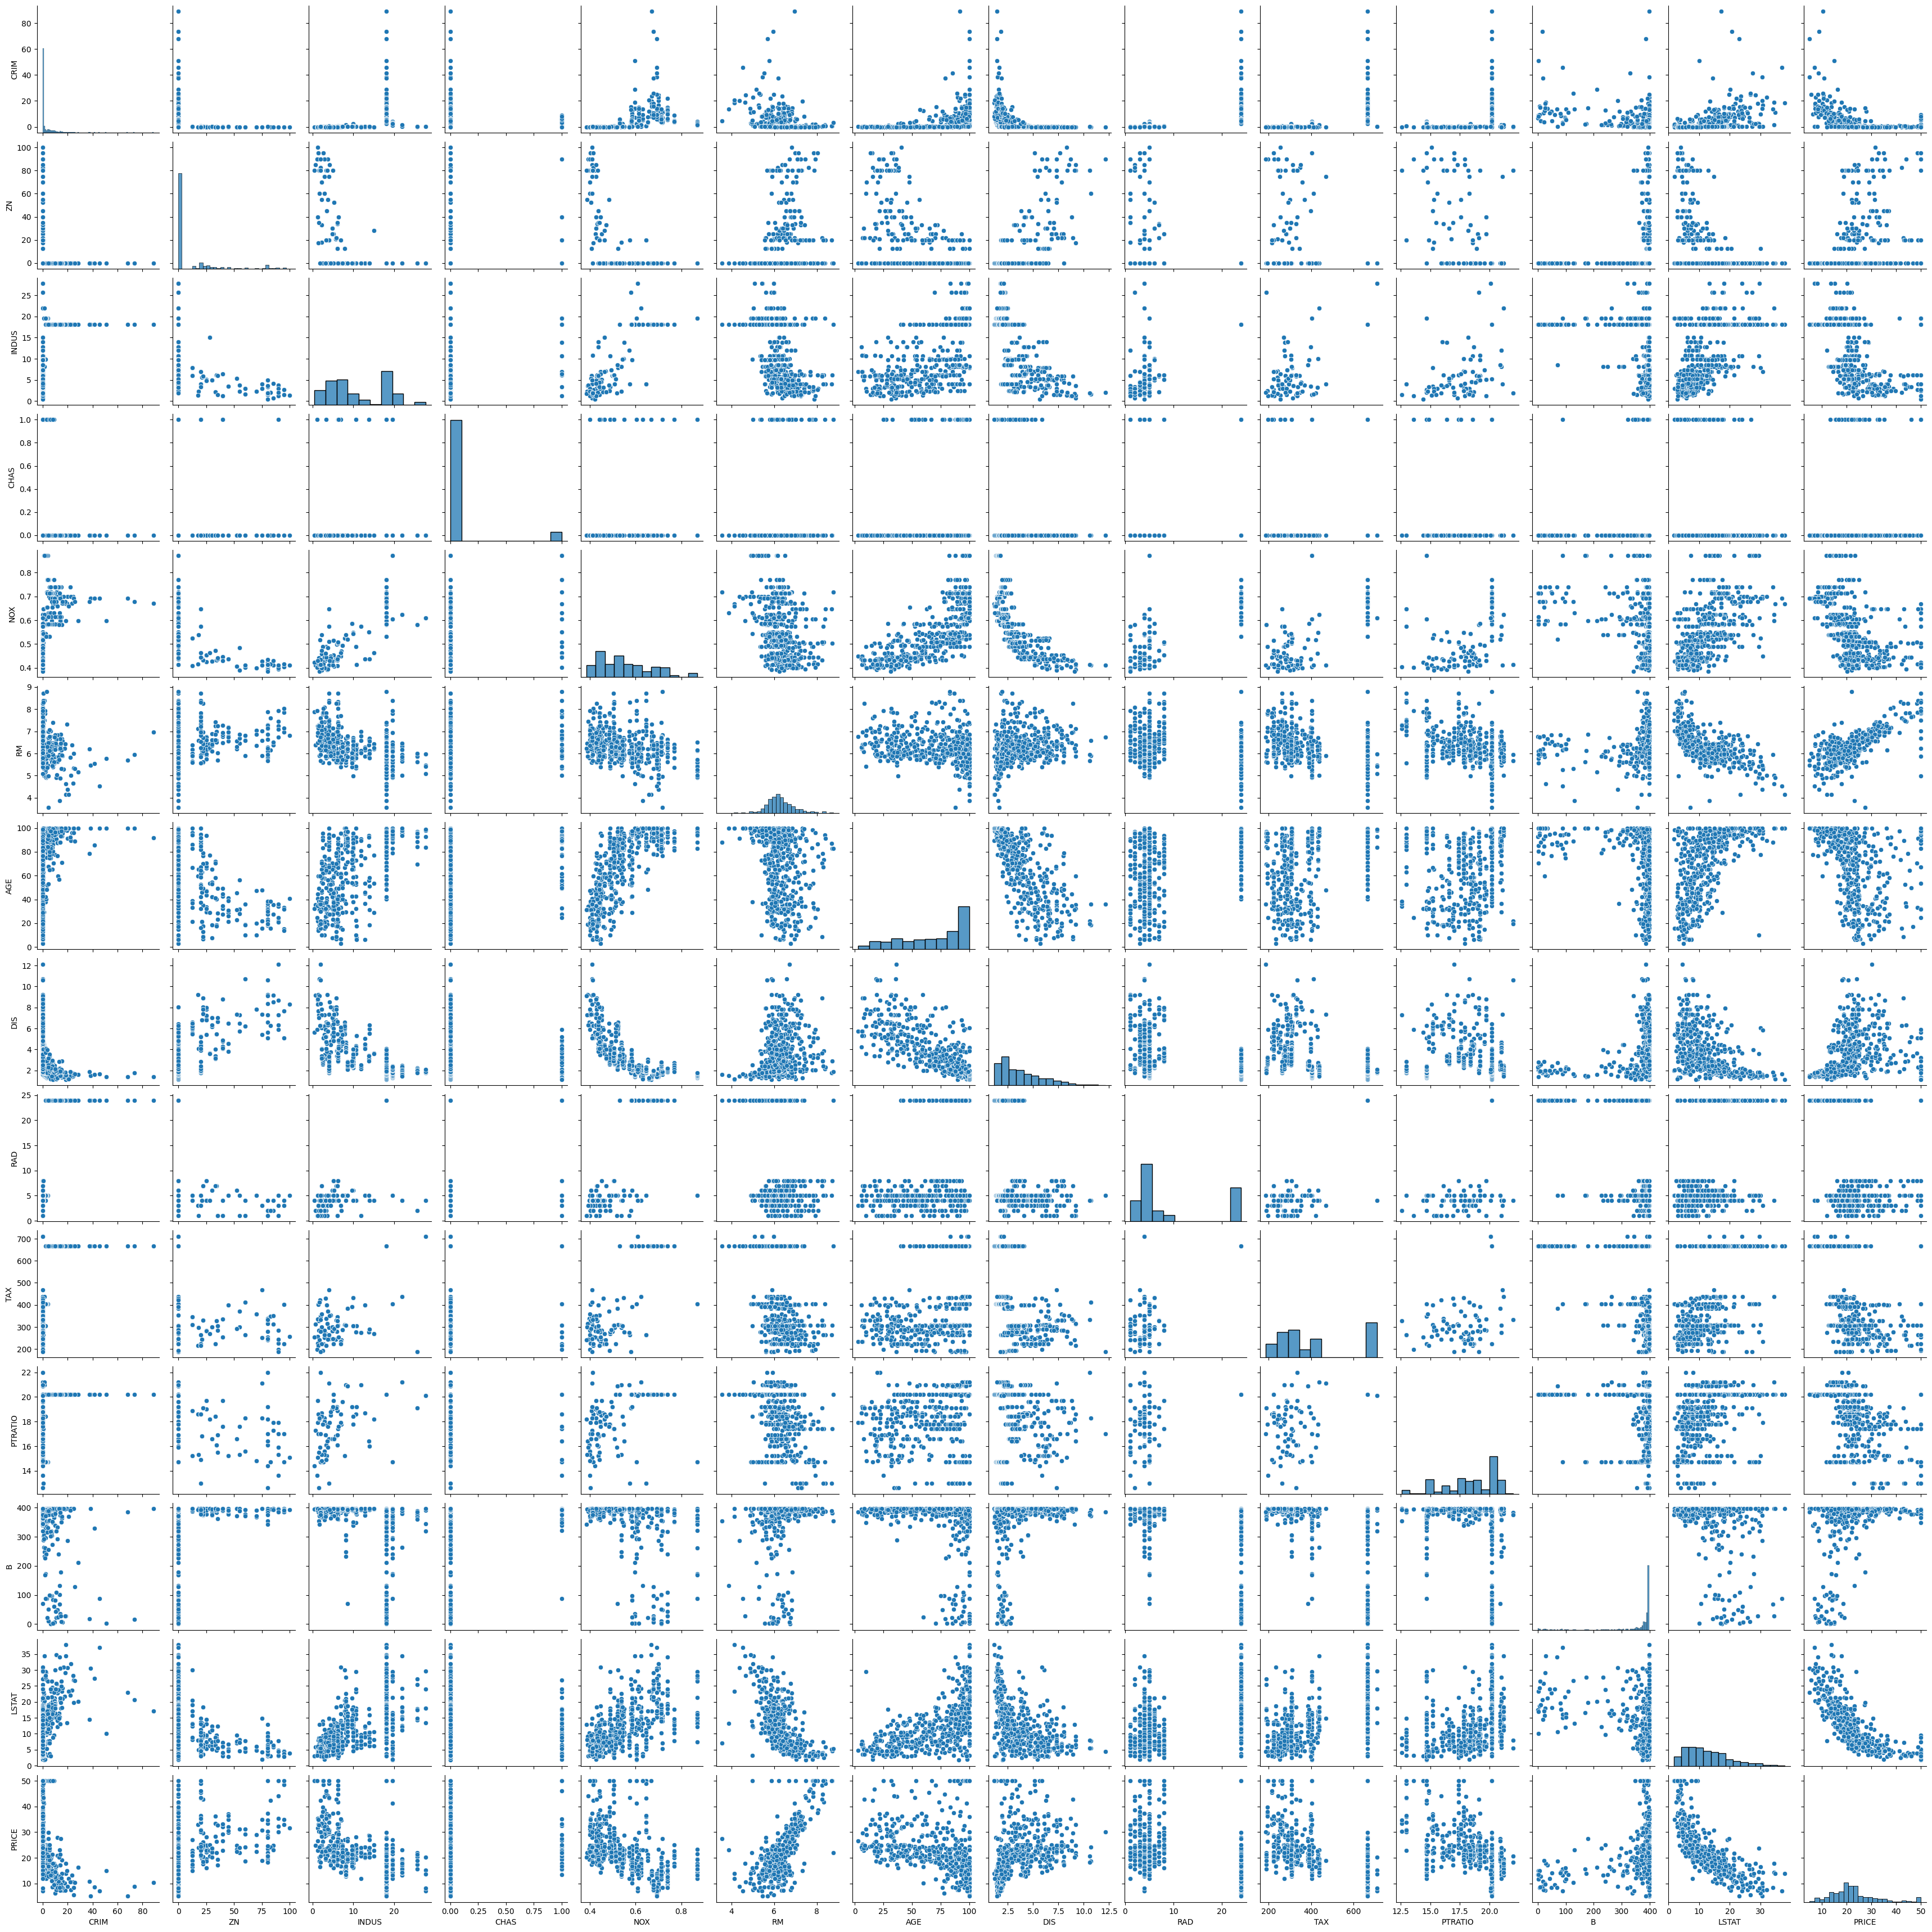

In [91]:
sns.pairplot(data)

# including a regression line
# sns.pairplot(
#     data, 
#     kind='reg', 
#     plot_kws={'line_kws':{'color': 'red'}}
#     )

plt.show()

There are scatterplots between all the columns in our dataset. And down the diagonal, we get histograms for all our columns. 



Using [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail. Creating a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

Adding some opacity or `alpha` to the scatter plots using keyword arguments under `joint_kws`.

#### Distance from Employment vs. Pollution

Comparing DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as the distance increases? 

<Figure size 1200x800 with 0 Axes>

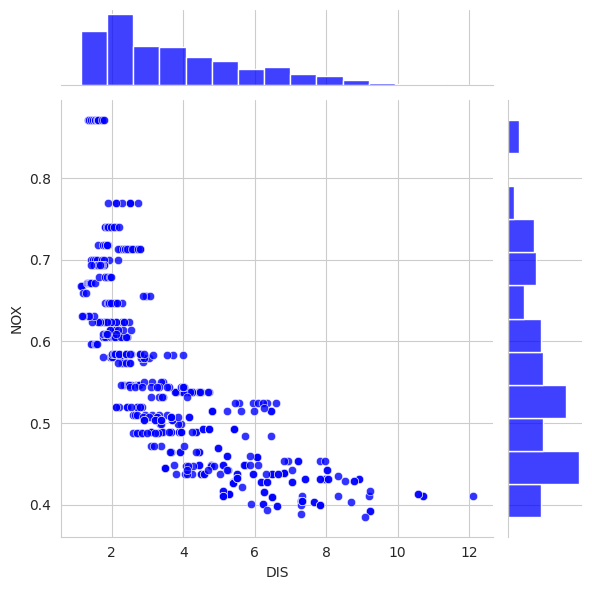

In [92]:
plt.figure(figsize=(6,4), dpi=200)

with sns.axes_style('whitegrid'):
    sns.jointplot(
        data,
        x = 'DIS',
        y = 'NOX',
        height=6,
        kind = 'scatter',
        color='blue',
        joint_kws={'alpha':0.8}
        )

plt.show()

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 


Comparing INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as there is a higher proportion of industry?

<Figure size 1200x800 with 0 Axes>

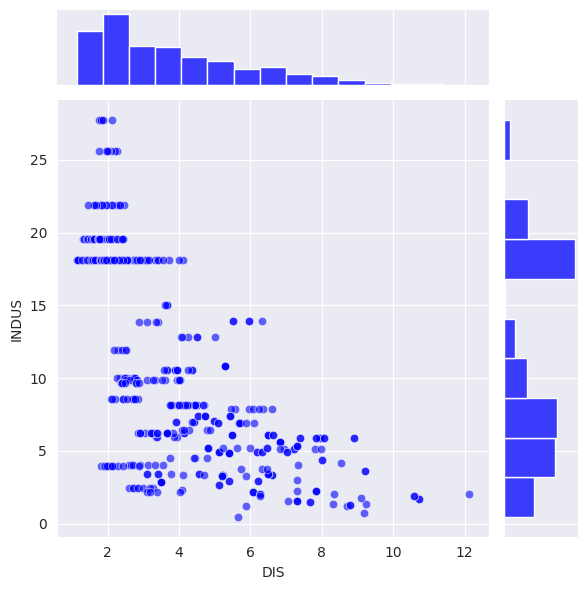

In [93]:
plt.figure(figsize=(6,4), dpi=200)

with sns.axes_style('darkgrid'):
    sns.jointplot(
        data,
        x = 'DIS',
        y = 'INDUS',
        height=6,
        kind = 'scatter',
        color='blue',
        joint_kws={'alpha':0.6}
        )

plt.show()

#### % of Lower Income Population vs Average Number of Rooms

Comparing LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`. How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

<Figure size 1200x800 with 0 Axes>

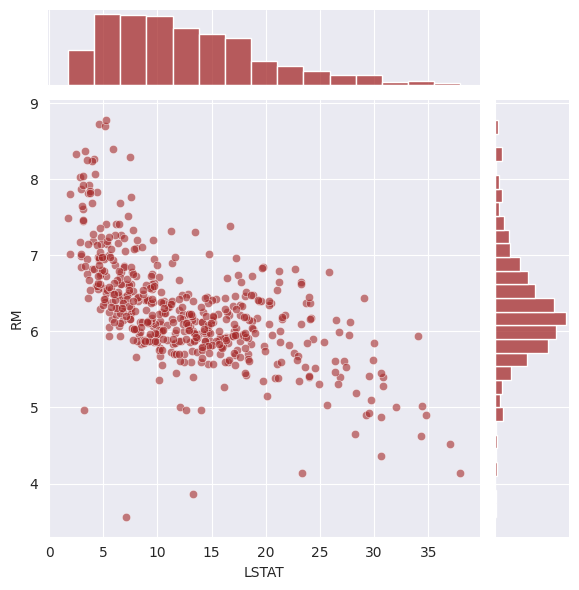

In [94]:
plt.figure(figsize=(6,4), dpi=200)

with sns.axes_style('darkgrid'):
    sns.jointplot(
        data,
        x = 'LSTAT',
        y = 'RM',
        height=6,
        kind = 'scatter',
        color='brown',
        joint_kws={'alpha':0.6}
        )

plt.show()

#### % of Lower Income Population versus Home Price

Comparing LSTAT with PRICE using Seaborn's `.jointplot()`. How does the proportion of the lower-income population in an area affect home prices?

<Figure size 1200x800 with 0 Axes>

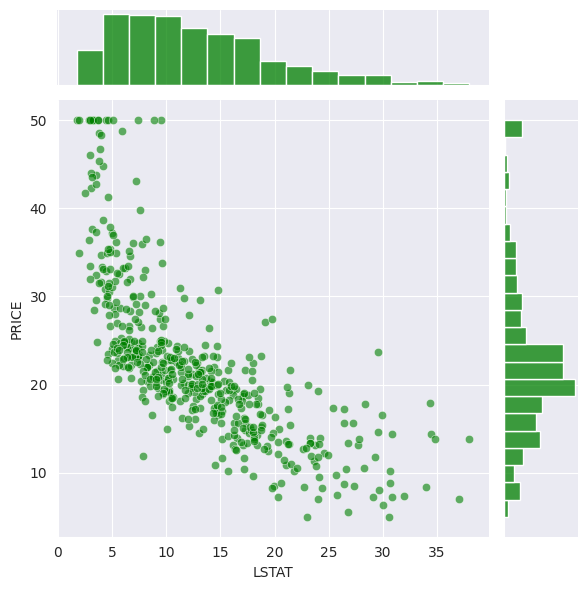

In [95]:
plt.figure(figsize=(6,4), dpi=200)

with sns.axes_style('darkgrid'):
    sns.jointplot(
        data,
        x = 'LSTAT',
        y = 'PRICE',
        height=6,
        kind = 'scatter',
        color='green',
        joint_kws={'alpha':0.6}
        )

plt.show()

#### Number of Rooms versus Home Value


Comparing RM (number of rooms) with PRICE using Seaborn's `.jointplot()`. You can probably guess how the number of rooms affects home prices. 😊 

<Figure size 1200x800 with 0 Axes>

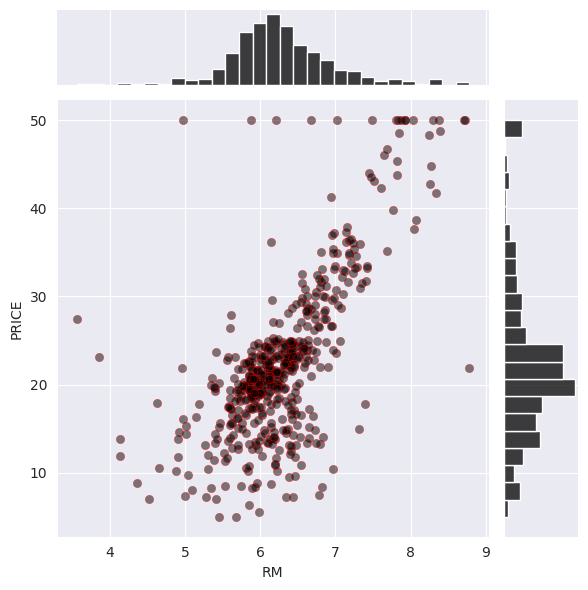

In [96]:
plt.figure(figsize=(6,4), dpi=200)

with sns.axes_style('darkgrid'):
    sns.jointplot(
        data,
        x = 'RM',
        y = 'PRICE',
        height=6,
        kind = 'scatter',
        color='black',
        ec='red',
        joint_kws={'alpha':0.5}
        )

plt.show()

We see those homes at the $50,000 mark all lined up at the top. Maybe there was a mistake or a cap ?

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world. 


* Importing the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn
* Creating 4 subsets: X_train, X_test, y_train, y_test
* Spliting the training and testing data roughly 80/20. 
* For getting the same random split every time you run your notebook use `random_state=10`. This helps us get the same results every time and avoid confusion while we're learning. 


**The target** is home PRICE, **features** are all the other columns to predict the price. 


In [198]:
target = data["PRICE"].copy(deep=True)
features = data.copy(deep=True)
features.drop('PRICE', inplace=True, axis=1)
# features.head()
# target.head()

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
                                                features, target, 
                                                test_size=0.20, 
                                                random_state=10
                                                )

In [200]:
train_pct = len(X_train)/len(features) *100
print(f"The train data makes {train_pct:.3}% of all data.")

test_pct = len(X_test)/len(features) *100
print(f"The test data makes {test_pct:.3}% of all data.")

The train data makes 79.8% of all data.
The test data makes 20.2% of all data.


# Multivariable Regression

This time we have a total of 13 features. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Running Your First Regression

Using sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [201]:
regression = LinearRegression()

In [202]:
regression.fit(X_train, y_train)

LinearRegression()

One measure of how well our model does is by looking at a metric called r-squared.

In [203]:
print(f"Regression  r-squared is {regression.score(X_train, y_train):.2} ")

Regression  r-squared is 0.75 


0.75 is a very high score !

### Evaluating the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Printing out the coefficients (the thetas in the equation above) for the features. Putting them into s FsysFrame will give you a nice table.

* We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
* What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
* Check the other coefficients. Do they have the expected sign?
* Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room? 

In [204]:
regression.intercept_

36.5330513828241

In [205]:
coefficients = pd.DataFrame(data=regression.coef_, index=X_train.columns, columns=['COEF'])
coefficients

,COEF
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [206]:
print(f"The price premium for an extra room is {coefficients.loc['RM'].values[0]*1000:.6} $")

The price premium for an extra room is 3108.46 $


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```

Creating two scatter plots.

In [207]:
predicted_values = regression.predict(X_train)
residuals = (y_train - predicted_values)

The first plot will be actual values (`y_train`) against the predicted value values

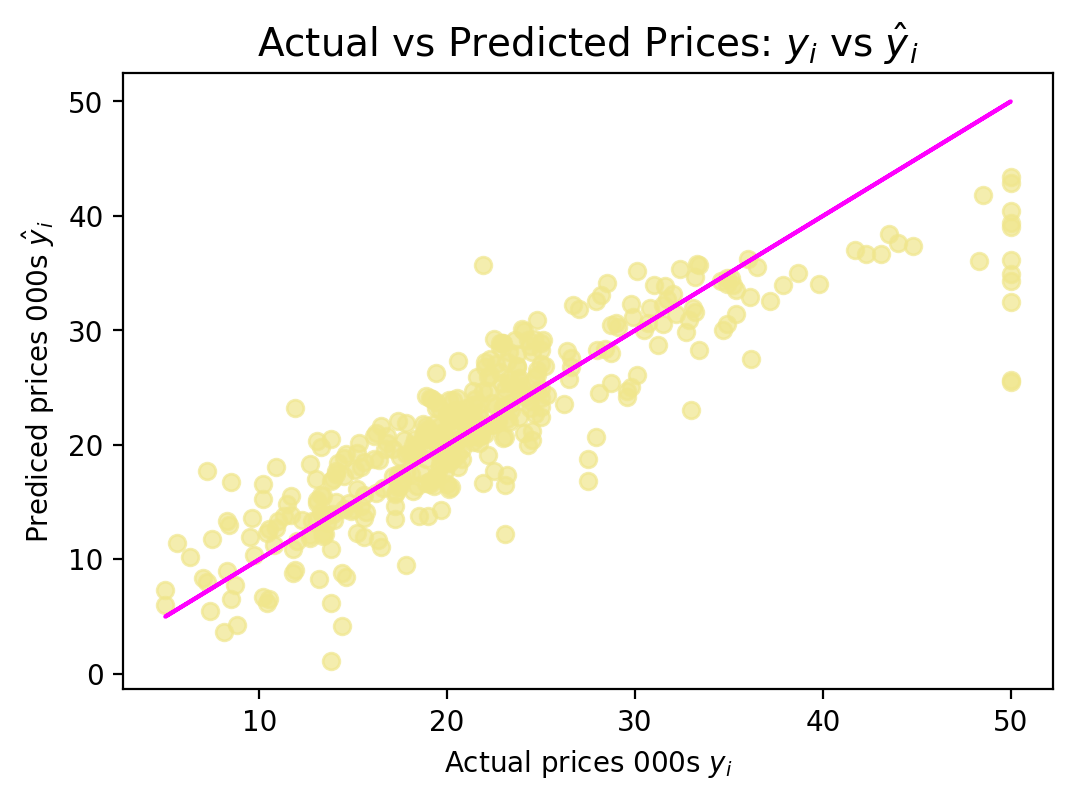

In [208]:
plt.figure(figsize=(6,4), dpi=200)

# with sns.axes_style('darkgrid'):
#     ax =sns.regplot(
#         x = y_train,
#         y = predicted_values,
#         color='black',
#         line_kws={'color':'cyan'},
#         )

#     ax.set(
#         xlabel="Actual prices 000s yi",
#         ylabel="Predicted prieces 000s yi",
#     )

plt.scatter(
    x = y_train,
    y = predicted_values,
    alpha=0.7,
    color='khaki',
)
plt.plot(
    y_train,
    y_train,
    color = 'fuchsia',
)
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=14)
plt.xlabel('Actual prices 000s $y _i$', fontsize=10)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=10)
plt.show()



The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, our residuals.

The second plot will be the residuals against the predicted prices.

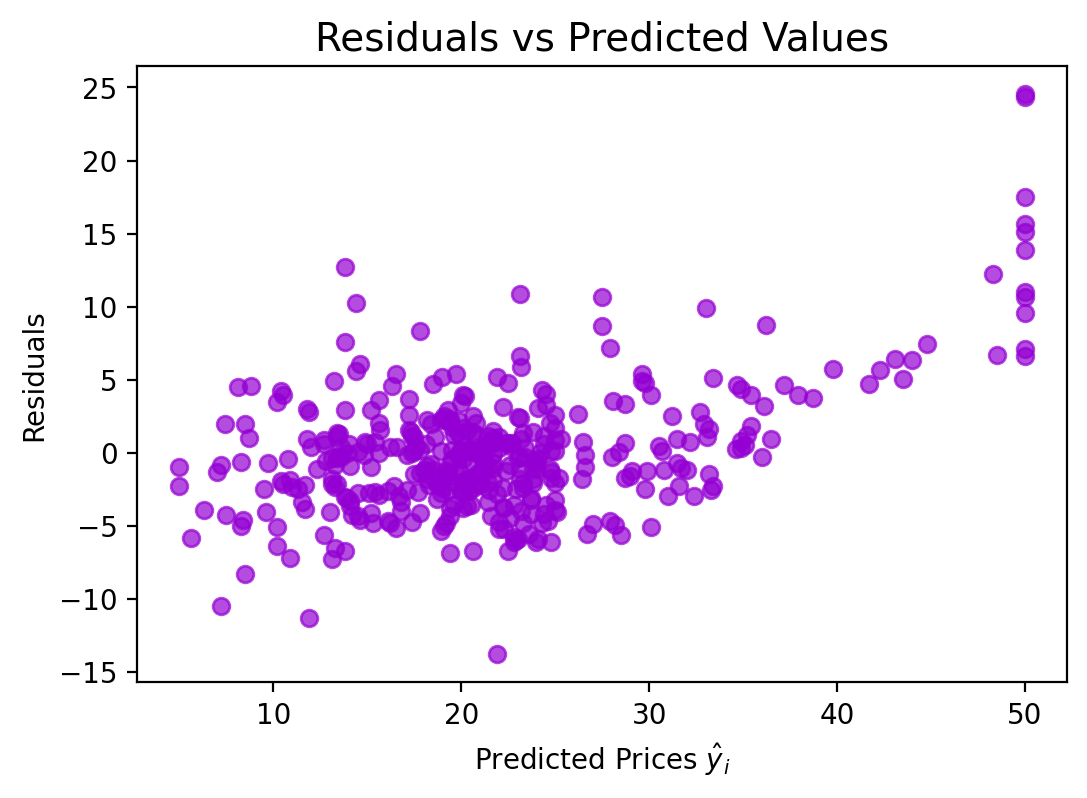

In [209]:
plt.figure(figsize=(6,4), dpi=200)

plt.scatter(
    x = y_train,
    y = residuals,
    alpha=0.7,
    color='darkviolet',
)

plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=10)
plt.ylabel('Residuals', fontsize=10)
plt.show()

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 


* Calculating the mean and the skewness of the residuals. 
* Using Seaborn's `.displot()` to create a histogram and superimpose the Kernel Density Estimate (KDE)
* Is the skewness different from zero? If so, by how much? 
* Is the mean different from zero?

<Figure size 1200x800 with 0 Axes>

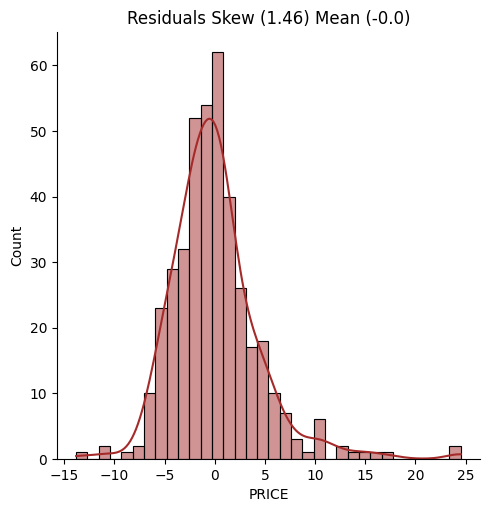

In [210]:
residuals_mean = round(residuals.mean(), 2)
residuals_skew =  round(residuals.skew(), 2)

plt.figure(figsize=(6,4), dpi=200)

sns.displot(residuals, kde=True, color='brown')
plt.title(f'Residuals Skew ({residuals_skew}) Mean ({residuals_mean})')

plt.show()


We see that the residuals have a skewness of 1.46. There could be some room for improvement here.  

### Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 

Let's try a data transformation approach. 


Investigating if the target `data['PRICE']` could be a suitable candidate for a log transformation. 

* Using Seaborn's `.displot()` to show a histogram and KDE of the price data. 
* Calculating the skew of that distribution.
* Using [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Ploting the log prices using Seaborn's `.displot()` and calculate the skew. 
* Which distribution has a skew that's closer to zero? 


<Figure size 1200x800 with 0 Axes>

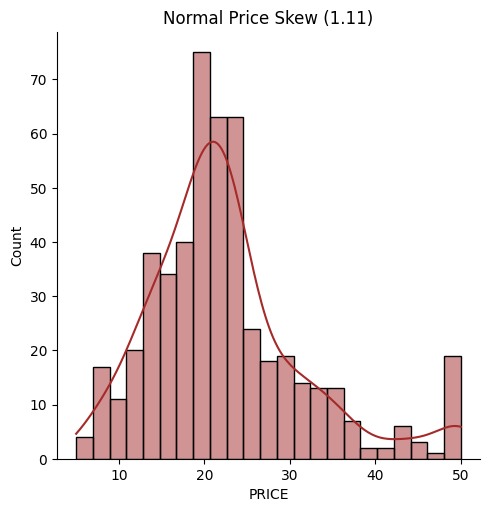

In [211]:
price_skew = data.PRICE.skew()

plt.figure(figsize=(6,4), dpi=200)

sns.displot(
    data.PRICE,
    kde=True, 
    color='brown',
)

plt.title(f'Normal Price Skew ({price_skew:.3})')
plt.show()




<Figure size 1200x800 with 0 Axes>

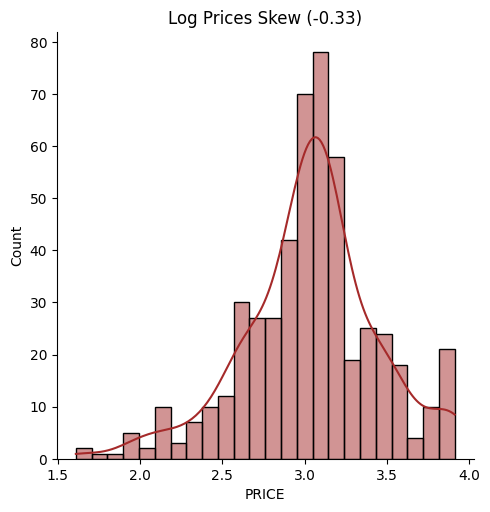

In [212]:
log_prices = np.log(data.PRICE)

log_prices_skew = log_prices.skew()

plt.figure(figsize=(6,4), dpi=200)

sns.displot(
    log_prices,
    kde=True, 
    color='brown',
)

plt.title(f'Log Prices Skew ({log_prices_skew:.3})')
plt.show()

The log prices have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals. 

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

We can see this when we plot the actual prices against the (transformed) log prices. 

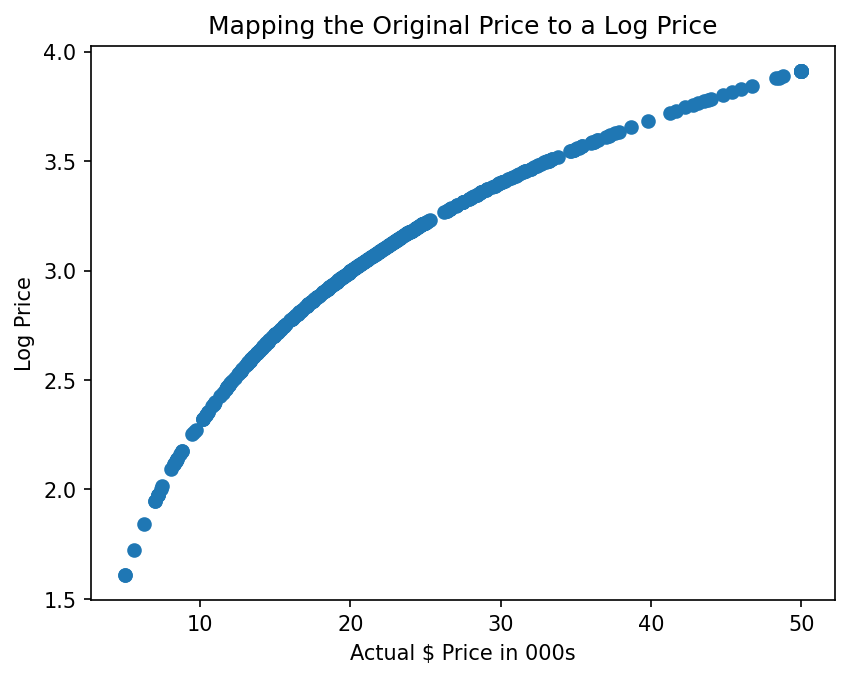

In [213]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$


* Using `train_test_split()` with the same random state as before to make the results comparable. 
* Running a second regression, but this time use the transformed target data. 
* What is the r-squared of the regression on the training data? 
* Have we improved the fit of our model compared to before based on this measure?


In [214]:
target =log_prices
features = data.copy(deep=True)
features.drop('PRICE', inplace=True, axis=1)


X_train, X_test, y_log_train, y_log_test = train_test_split(
                                                features, target, 
                                                test_size=0.20, 
                                                random_state=10
                                                )
train_pct = len(X_train)/len(features) *100
print(f"The train data makes {train_pct:.3}% of all data.")

test_pct = len(X_test)/len(features) *100
print(f"The test data makes {test_pct:.3}% of all data.")
## Regression using Log Prices


The train data makes 79.8% of all data.
The test data makes 20.2% of all data.


In [215]:
regression2 = LinearRegression()
regression2.fit(X_train, y_log_train)

LinearRegression()

In [218]:
print(f"Regression  r-squared is {round(regression2.score(X_train, y_log_train),4)} ")

Regression  r-squared is 0.793 


An r-squared of 0.79 compared to 0.75 looks like a promising improvement.

## Evaluating Coefficients with Log Prices

Printing out the coefficients of the new regression model. 

* Do the coefficients still have the expected sign? 
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher? 

Using a DataFrame to make the output look pretty. 

In [219]:
coefficients = pd.DataFrame(data=regression2.coef_, index=X_train.columns, columns=['COEF'])
coefficients

,COEF
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


So how can we interpret the coefficients? The key thing we look for is still the sign - being close to the river results in higher property prices because CHAS has a coefficient greater than zero. Therefore property prices are higher next to the river. 

More students per teacher - a higher PTRATIO - is a clear negative. Smaller classroom sizes are indicative of higher quality education, so have a negative coefficient for PTRATIO. 

## Regression with Log Prices & Residual Plots


* Copy-pasting the cell where we have created scatter plots of the actual versus the predicted home prices as well as the residuals versus the predicted values. 
* Adding 2 more plots to the cell so that you can compare the regression outcomes with the log prices side by side. 

In [225]:
predicted_log_values = regression2.predict(X_train)
residuals_log = (y_log_train - predicted_log_values)

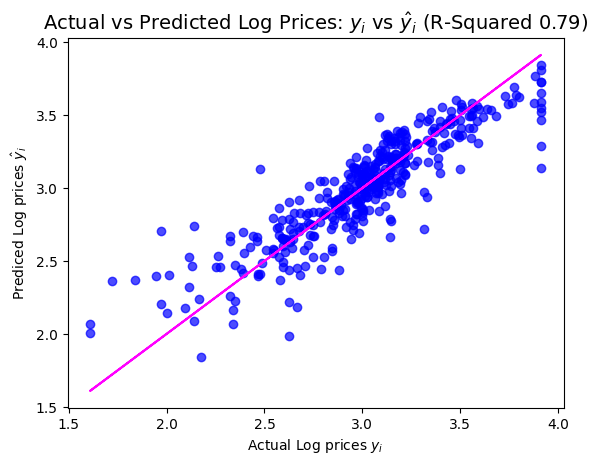

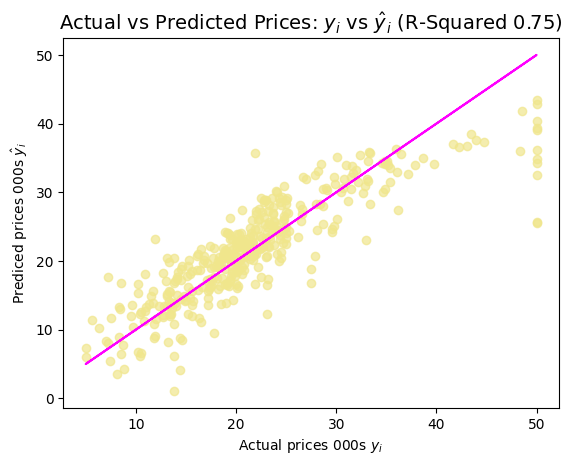

In [232]:
# Graph of Actual vs. Predicted Log Prices
plt.scatter(
    x = y_log_train,
    y = predicted_log_values,
    alpha=0.7,
    color='blue',
)
plt.plot(
    y_log_train,
    y_log_train,
    color = 'fuchsia',
)
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {regression2.score(X_train, y_log_train):.2})', fontsize=14)
plt.xlabel('Actual Log prices $y _i$', fontsize=10)
plt.ylabel('Prediced Log prices $\hat y _i$', fontsize=10)
plt.show()

# Graph of Actual vs. Predicted Prices
plt.scatter(
    x = y_train,
    y = predicted_values,
    alpha=0.7,
    color='khaki',
)
plt.plot(
    y_train,
    y_train,
    color = 'fuchsia',
)
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {regression.score(X_train, y_train):.2})', fontsize=14)
plt.xlabel('Actual prices 000s $y _i$', fontsize=10)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=10)
plt.show()

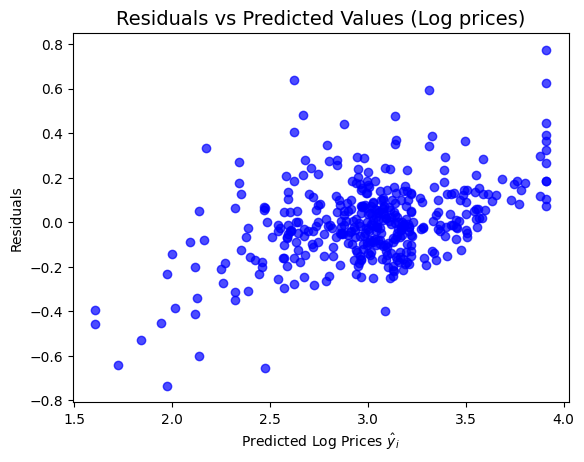

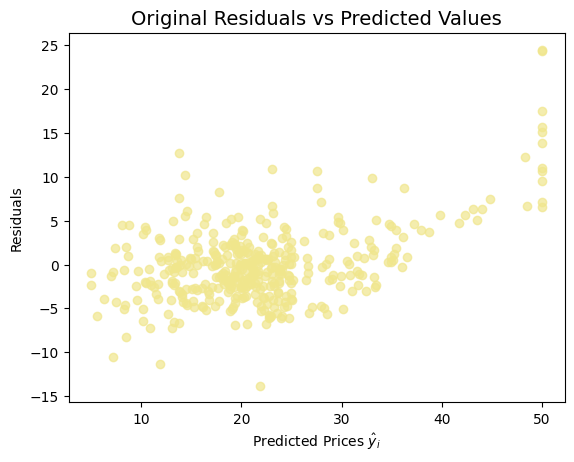

In [234]:
# Residuals vs Predicted values (Log prices)
plt.scatter(
    x = y_log_train,
    y = residuals_log,
    alpha=0.7,
    color='blue',
)

plt.title('Residuals vs Predicted Values (Log prices)', fontsize=14)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=10)
plt.ylabel('Residuals', fontsize=10)
plt.show()

# Residuals vs Predicted values
plt.scatter(
    x = y_train,
    y = residuals,
    alpha=0.7,
    color='khaki',
)

plt.title('Original Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=10)
plt.ylabel('Residuals', fontsize=10)
plt.show()

Calculating the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

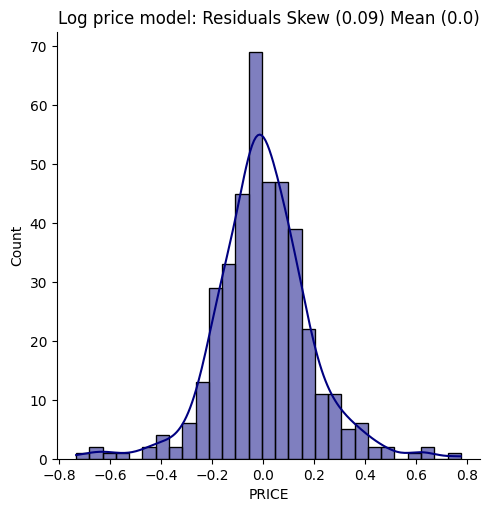

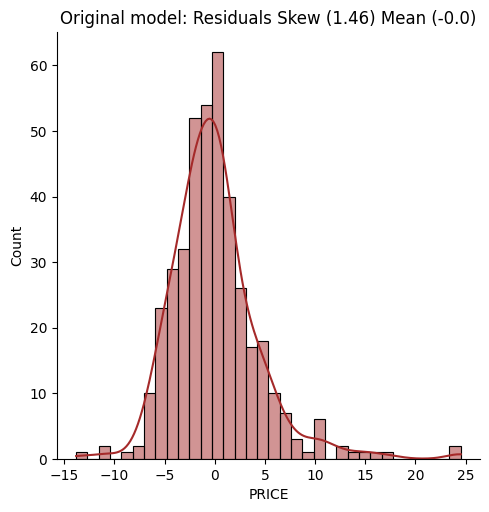

In [237]:
residuals_log_mean = round(residuals_log.mean(), 2)
residuals_log_skew =  round(residuals_log.skew(), 2)


sns.displot(residuals_log, kde=True, color='navy')
plt.title(f'Log price model: Residuals Skew ({residuals_log_skew}) Mean ({residuals_log_mean})')
plt.show()

sns.displot(residuals, kde=True, color='brown')
plt.title(f'Original model: Residuals Skew ({residuals_skew}) Mean ({residuals_mean})')
plt.show()

# Comparing Performance

The *real* test is how our model performs on data that it has not "seen" yet (`X_test`). 


Comparing the r-squared of the two models on the test dataset. Which model does better? Is the r-squared higher or lower than for the training dataset? Why?

In [240]:
print(f'Original Model Test Data r-squared: {regression.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {regression2.score(X_test, y_log_test):.2}')


Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


The model has not been optimised for the testing data - worse performance on the training data. Our r-squared is still high!
Which means we can use our model to predict house prices.

# Predicting a Property's Value using the Regression Coefficients

The preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [242]:
# Starting Point: Average Values in the Dataset
features = data.copy(deep=True)
features.drop('PRICE', inplace=True, axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(
    data=average_vals.reshape(1, len(features.columns)),
    columns= features.columns,
)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


Predicting how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate? [Reversing the log transformation with `.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp) to find the dollar value. 

In [247]:
# prediction
log_average_price_property = regression2.predict(property_stats)[0]
print(f'The log price estimate is ${log_average_price_property:.3}')

# Convert Log Prices to Acutal Dollar Values
# dollar_est = np.e**log_estimate * 1000

print(f'The average property is estimated to be worth ${np.exp(log_average_price_property) * 1000:.7}')

The log price estimate is $3.03
The average property is estimated to be worth $20703.18


Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [248]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [249]:
# Solution:

property_stats_to_evaluate = property_stats
property_stats_to_evaluate['CHAS'] = 1 if next_to_river else 0
property_stats_to_evaluate['RM'] = nr_rooms
property_stats_to_evaluate['PTRATIO'] = students_per_classroom
property_stats_to_evaluate['DIS'] = distance_to_town
property_stats_to_evaluate['NOX'] = pollution
property_stats_to_evaluate['LSTAT'] = amount_of_poverty

log_property_to_evaluate = regression2.predict(property_stats_to_evaluate)[0]


In [252]:
print(f'The log price estimate is ${log_property_to_evaluate:.3}')

print(f'The predicted price of a property with the given stats is ${np.exp(log_property_to_evaluate) * 1000:.7}')

The log price estimate is $3.25
The predicted price of a property with the given stats is $25792.03
